
1-БӨЛІМ: KNN

Тапсырма 1: KNN (k=3 және k=7) — accuracy салыстыру
k=3 -> accuracy=1.0000
k=7 -> accuracy=0.9667

Тапсырма 2: Scaling дейін/кейін (KNN, k=7)
Scaling дейін  accuracy=0.9667
Scaling кейін accuracy=0.9667

Тапсырма 3: k=1..20 үшін accuracy + график (scaled)
k -> accuracy
 1 -> 0.9667
 2 -> 0.9333
 3 -> 0.9333
 4 -> 0.9333
 5 -> 0.9333
 6 -> 0.9333
 7 -> 0.9667
 8 -> 0.9333
 9 -> 0.9667
10 -> 0.9667
11 -> 0.9667
12 -> 0.9667
13 -> 0.9667
14 -> 0.9667
15 -> 0.9667
16 -> 0.9667
17 -> 0.9667
18 -> 0.9667
19 -> 0.9667
20 -> 0.9667
Ең жақсы k = 1 | accuracy = 0.9666666666666667


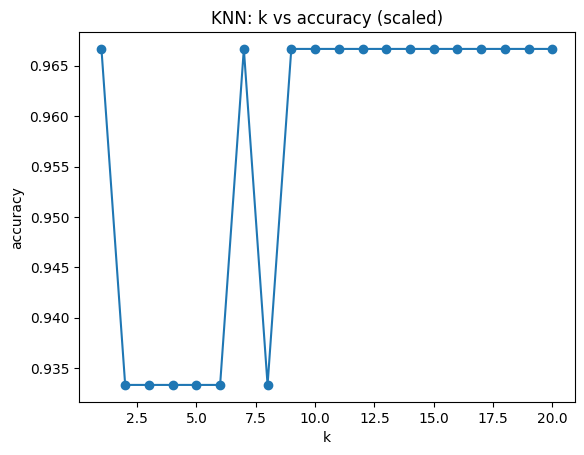


2-БӨЛІМ: SVM

Тапсырма 4: SVM kernel (linear, rbf, poly) — accuracy
kernel=linear -> accuracy=1.0000
kernel=rbf    -> accuracy=0.9667
kernel=poly   -> accuracy=0.9000

Тапсырма 5: SVM (rbf) үшін C=0.1,1,10 — train/test салыстыру
C=0.1  | train_acc=0.9000 | test_acc=0.9000 | gap=+0.0000
C=1    | train_acc=0.9750 | test_acc=0.9667 | gap=+0.0083
C=10   | train_acc=0.9750 | test_acc=0.9667 | gap=+0.0083

Тапсырма 6: GridSearchCV (rbf) — C және gamma оптимизация
Best params: {'C': 1, 'gamma': 0.1}
CV best score: 0.9833
Test accuracy: 0.9667

3-БӨЛІМ: NAIVE BAYES

Тапсырма 7: GaussianNB — accuracy/precision/recall + confusion matrix (Iris)
Accuracy: 0.9667
Precision(macro): 0.9697
Recall(macro): 0.9667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Тапсырма 8: 20 Newsgroups + TF-IDF + MultinomialNB (Binary)
Categories: ['sci.space', 'rec.sport.hockey']
Accuracy: 0.9508
Confusion Matrix:
 [[391   8]
 [ 31 363]]
Classification Report:
                   precision    recall  f1-score

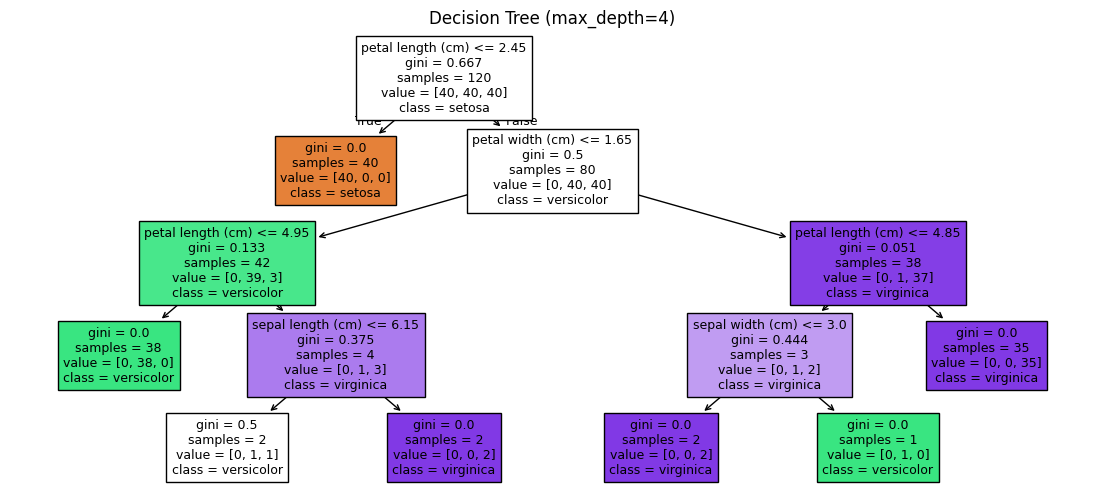

Feature importances:
 petal length (cm)    0.565639
petal width (cm)     0.411154
sepal width (cm)     0.016878
sepal length (cm)    0.006329
dtype: float64

Тапсырма 12: DecisionTree vs RandomForest — бірнеше random_state бойынша салыстыру
DecisionTree accuracies: [0.9667, 0.9667, 0.9, 0.9667, 0.9667]
RandomForest accuracies: [0.9667, 0.9667, 0.8667, 1.0, 0.9333]
DT mean/std: 0.9533 / 0.0267
RF mean/std: 0.9467 / 0.0452

5-БӨЛІМ: КЛАСТЕРЛЕУ

Тапсырма 13: KMeans(k=3) + PCA(2D) визуализация + центрлер


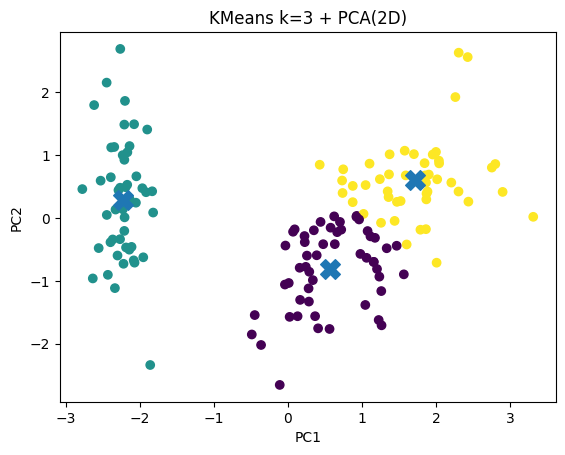

Cluster centers (standardized space):
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]

Тапсырма 14: Elbow method (k=2..10) — inertia графигі
k=2 -> inertia=222.36
k=3 -> inertia=139.82
k=4 -> inertia=114.09
k=5 -> inertia=90.93
k=6 -> inertia=81.54
k=7 -> inertia=72.63
k=8 -> inertia=62.54
k=9 -> inertia=55.12
k=10 -> inertia=47.39


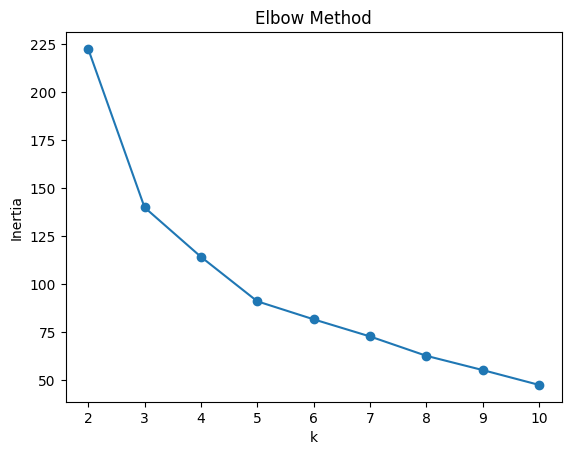


Тапсырма 15: KMeans vs DBSCAN vs Hierarchical — silhouette score
KMeans silhouette: 0.4599
Hierarchical silhouette: 0.4467
DBSCAN silhouette: 0.5234
DBSCAN noise үлесі (%): 4.0


In [1]:
# ============================================================
# ✅ Есептер.docx — Google Colab-та орындауға дайын толық код
# (KNN, SVM, Naive Bayes, Decision Tree, RandomForest, Clustering)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, silhouette_score
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer


def header(title: str):
    print("\n" + "=" * 90)
    print(title)
    print("=" * 90)


# ============================================================
# ДЕРЕК: IRIS (көп тапсырма осы деректе)
# ============================================================
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


# ============================================================
# 1-БӨЛІМ: KNN
# ============================================================
header("1-БӨЛІМ: KNN")

# 1) k=3 және k=7 салыстыру
header("Тапсырма 1: KNN (k=3 және k=7) — accuracy салыстыру")
for k in [3, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(f"k={k} -> accuracy={accuracy_score(y_test, pred):.4f}")

# 2) Scaling дейін/кейін
header("Тапсырма 2: Scaling дейін/кейін (KNN, k=7)")
knn_raw = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
acc_raw = accuracy_score(y_test, knn_raw.predict(X_test))

knn_scaled = KNeighborsClassifier(n_neighbors=7).fit(X_train_s, y_train)
acc_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_s))

print(f"Scaling дейін  accuracy={acc_raw:.4f}")
print(f"Scaling кейін accuracy={acc_scaled:.4f}")

# 3) k=1..20 + график
header("Тапсырма 3: k=1..20 үшін accuracy + график (scaled)")
ks = list(range(1, 21))
accs = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_s, y_train)
    accs.append(accuracy_score(y_test, knn.predict(X_test_s)))

best_k = ks[int(np.argmax(accs))]
print("k -> accuracy")
for k, a in zip(ks, accs):
    print(f"{k:2d} -> {a:.4f}")
print("Ең жақсы k =", best_k, "| accuracy =", max(accs))

plt.figure()
plt.plot(ks, accs, marker="o")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.title("KNN: k vs accuracy (scaled)")
plt.show()


# ============================================================
# 2-БӨЛІМ: SVM
# ============================================================
header("2-БӨЛІМ: SVM")

# 4) kernel салыстыру
header("Тапсырма 4: SVM kernel (linear, rbf, poly) — accuracy")
for ker in ["linear", "rbf", "poly"]:
    svm = SVC(kernel=ker, C=1.0, gamma="scale", degree=3)
    svm.fit(X_train_s, y_train)
    pred = svm.predict(X_test_s)
    print(f"kernel={ker:6s} -> accuracy={accuracy_score(y_test, pred):.4f}")

# 5) C параметрі
header("Тапсырма 5: SVM (rbf) үшін C=0.1,1,10 — train/test салыстыру")
for C in [0.1, 1, 10]:
    svm = SVC(kernel="rbf", C=C, gamma="scale")
    svm.fit(X_train_s, y_train)
    tr = accuracy_score(y_train, svm.predict(X_train_s))
    te = accuracy_score(y_test, svm.predict(X_test_s))
    print(f"C={C:<4} | train_acc={tr:.4f} | test_acc={te:.4f} | gap={tr-te:+.4f}")

# 6) GridSearchCV (жеңілдетілген, Colab-та тез жүреді)
header("Тапсырма 6: GridSearchCV (rbf) — C және gamma оптимизация")
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.01, 0.1, 1, "scale"]
}
grid = GridSearchCV(SVC(kernel="rbf"), param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_s, y_train)

best_model = grid.best_estimator_
best_test_acc = accuracy_score(y_test, best_model.predict(X_test_s))

print("Best params:", grid.best_params_)
print("CV best score:", round(grid.best_score_, 4))
print("Test accuracy:", round(best_test_acc, 4))


# ============================================================
# 3-БӨЛІМ: NAIVE BAYES
# ============================================================
header("3-БӨЛІМ: NAIVE BAYES")

# 7) GaussianNB + метрикалар
header("Тапсырма 7: GaussianNB — accuracy/precision/recall + confusion matrix (Iris)")
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, pred), 4))
print("Precision(macro):", round(precision_score(y_test, pred, average="macro", zero_division=0), 4))
print("Recall(macro):", round(recall_score(y_test, pred, average="macro", zero_division=0), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

# 8) Text classification (20 newsgroups) + TF-IDF + MultinomialNB (binary demo)
header("Тапсырма 8: 20 Newsgroups + TF-IDF + MultinomialNB (Binary)")

cats = ["sci.space", "rec.sport.hockey"]
train_ng = fetch_20newsgroups(subset="train", categories=cats, remove=("headers", "footers", "quotes"))
test_ng  = fetch_20newsgroups(subset="test", categories=cats, remove=("headers", "footers", "quotes"))

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.9, min_df=2)
Xtr = vectorizer.fit_transform(train_ng.data)
Xte = vectorizer.transform(test_ng.data)

mnb = MultinomialNB()
mnb.fit(Xtr, train_ng.target)
pred = mnb.predict(Xte)

print("Categories:", cats)
print("Accuracy:", round(accuracy_score(test_ng.target, pred), 4))
print("Confusion Matrix:\n", confusion_matrix(test_ng.target, pred))
print("Classification Report:\n", classification_report(test_ng.target, pred, target_names=cats))

# 9) Text: NB vs KNN vs DecisionTree
header("Тапсырма 9: Text classification — NB vs KNN vs DecisionTree")

# NB
pred_nb = mnb.predict(Xte)
acc_nb = accuracy_score(test_ng.target, pred_nb)

# KNN (sparse-пен жұмыс істей береді)
knn_text = KNeighborsClassifier(n_neighbors=5)
knn_text.fit(Xtr, train_ng.target)
pred_knn = knn_text.predict(Xte)
acc_knn = accuracy_score(test_ng.target, pred_knn)

# DecisionTree (үлкен sparse-ті dense ету ауыр; сондықтан feature-ді азайтып аламыз)
Xtr_small = Xtr[:, :2000].toarray()
Xte_small = Xte[:, :2000].toarray()

dt_text = DecisionTreeClassifier(random_state=42, max_depth=50)
dt_text.fit(Xtr_small, train_ng.target)
pred_dt = dt_text.predict(Xte_small)
acc_dt = accuracy_score(test_ng.target, pred_dt)

print(f"MultinomialNB accuracy: {acc_nb:.4f}")
print(f"KNN accuracy:          {acc_knn:.4f}")
print(f"DecisionTree accuracy: {acc_dt:.4f}")


# ============================================================
# 4-БӨЛІМ: DECISION TREE + RANDOM FOREST
# ============================================================
header("4-БӨЛІМ: DECISION TREE + RANDOM FOREST")

# 10) max_depth салыстыру
header("Тапсырма 10: DecisionTree max_depth=2,4,6 — train/test")
for d in [2, 4, 6]:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    tr = accuracy_score(y_train, dt.predict(X_train))
    te = accuracy_score(y_test, dt.predict(X_test))
    print(f"max_depth={d} | train_acc={tr:.4f} | test_acc={te:.4f} | gap={tr-te:+.4f}")

# 11) Визуализация + feature importance
header("Тапсырма 11: DecisionTree визуализация + feature importance")
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

plt.figure(figsize=(14, 6))
plot_tree(
    dt,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    fontsize=9
)
plt.title("Decision Tree (max_depth=4)")
plt.show()

importances = pd.Series(dt.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
print("Feature importances:\n", importances)

# 12) DecisionTree vs RandomForest (тұрақтылық: бірнеше random_state)
header("Тапсырма 12: DecisionTree vs RandomForest — бірнеше random_state бойынша салыстыру")
states = [1, 2, 3, 4, 5]
dt_accs, rf_accs = [], []

for rs in states:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=rs, stratify=y)
    dtm = DecisionTreeClassifier(random_state=rs).fit(X_tr, y_tr)
    rfm = RandomForestClassifier(random_state=rs, n_estimators=200).fit(X_tr, y_tr)
    dt_accs.append(accuracy_score(y_te, dtm.predict(X_te)))
    rf_accs.append(accuracy_score(y_te, rfm.predict(X_te)))

print("DecisionTree accuracies:", [round(a, 4) for a in dt_accs])
print("RandomForest accuracies:", [round(a, 4) for a in rf_accs])
print("DT mean/std:", round(np.mean(dt_accs), 4), "/", round(np.std(dt_accs), 4))
print("RF mean/std:", round(np.mean(rf_accs), 4), "/", round(np.std(rf_accs), 4))


# ============================================================
# 5-БӨЛІМ: КЛАСТЕРЛЕУ
# ============================================================
header("5-БӨЛІМ: КЛАСТЕРЛЕУ")

# 13) KMeans k=3 + PCA
header("Тапсырма 13: KMeans(k=3) + PCA(2D) визуализация + центрлер")
X_s = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_s)
centers = kmeans.cluster_centers_

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_s)
centers_2d = pca.transform(centers)

plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], marker="X", s=200)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans k=3 + PCA(2D)")
plt.show()

print("Cluster centers (standardized space):\n", centers)

# 14) Elbow method
header("Тапсырма 14: Elbow method (k=2..10) — inertia графигі")
ks = list(range(2, 11))
inertias = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_s)
    inertias.append(km.inertia_)
    print(f"k={k} -> inertia={km.inertia_:.2f}")

plt.figure()
plt.plot(ks, inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# 15) KMeans vs DBSCAN vs Hierarchical + silhouette
header("Тапсырма 15: KMeans vs DBSCAN vs Hierarchical — silhouette score")

# KMeans
km = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_s)
km_sil = silhouette_score(X_s, km.labels_)
print("KMeans silhouette:", round(km_sil, 4))

# Hierarchical
hc = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X_s)
hc_sil = silhouette_score(X_s, hc.labels_)
print("Hierarchical silhouette:", round(hc_sil, 4))

# DBSCAN (параметрлер өзгерсе, нәтиже де өзгереді)
db = DBSCAN(eps=0.7, min_samples=5).fit(X_s)
db_labels = db.labels_

# silhouette есептеу үшін кемі 2 кластер керек (noise -1 есептеледі)
uniq_clusters = set(db_labels) - {-1}
if len(uniq_clusters) >= 2:
    db_sil = silhouette_score(X_s, db_labels)
    print("DBSCAN silhouette:", round(db_sil, 4))
else:
    print("DBSCAN silhouette: есептелмеді (кластер саны жеткіліксіз немесе көп нүкте noise)")

print("DBSCAN noise үлесі (%):", round(np.mean(db_labels == -1) * 100, 2))